In [1]:
import pandas as pd

## 1.Reading the data

In [2]:
data = pd.read_table('SMSSpamCollection',delimiter='\t',header=None)

In [3]:
data.columns = ['Lables','SMS']

In [4]:
data.head()

,Lables,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
data = data.drop_duplicates()

In [6]:
data.shape

(5169, 2)

In [7]:
data.reset_index(drop=True,inplace=True)

In [8]:
data.head()

,Lables,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## 2.  Text Pre-processing

In [9]:
#1. Converting the text into lower cases
for i in range(len(data.SMS)):
    data.SMS[i] = data.SMS[i].lower()

In [10]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [11]:
#2.removing stop words
# because stop words are common for all the sms and it can not help us to detect spam messages

In [12]:
from nltk.corpus import stopwords

In [13]:
stop_words = stopwords.words("english")

In [14]:
#Removing stopwords from all the SMS
for i in range(1):
    s = []
    for w in data.SMS[i].split():
        if w not in stop_words:
            s.append(w)
    data.SMS[i] = " ".join(s)
data.SMS

0       go jurong point, crazy.. available bugis n gre...
1                           ok lar... joking wif u oni...
2       free entry in 2 a wkly comp to win fa cup fina...
3       u dun say so early hor... u c already then say...
4       nah i don't think he goes to usf, he lives aro...
                              ...                        
5164    this is the 2nd time we have tried 2 contact u...
5165                 will ü b going to esplanade fr home?
5166    pity, * was in mood for that. so...any other s...
5167    the guy did some bitching but i acted like i'd...
5168                           rofl. its true to its name
Name: SMS, Length: 5169, dtype: object

In [15]:
data.head()

,Lables,SMS
0,ham,"go jurong point, crazy.. available bugis n gre..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


In [16]:
#Removing punctuation from all SMS
import string
p = string.punctuation

In [17]:
def remove_punctuation(text):
    s = []
    for c in text:
        if c not in p:
            s.append(c)
    return(''.join(s))

In [18]:
data['SMS'] = data['SMS'].apply(lambda x: remove_punctuation(x))

In [19]:
data.head()

,Lables,SMS
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he goes to usf he lives aroun...


In [20]:
#lemetization
lm = nltk.WordNetLemmatizer()
for i in range(len(data)):
    data.SMS[i] = " ".join([lm.lemmatize(w) for w in data.SMS[i].split()])

In [21]:
data.head()

,Lables,SMS
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he go to usf he life around h...


## 3. Data exploration

In [23]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [24]:
# creating string of spam and ham so that we can make word cloud
ham = ''
spam = ''
for i in range(len(data)):
    if data.Lables[i] == 'ham':
        ham += data.SMS[i]
    else:
        spam += data.SMS[i]

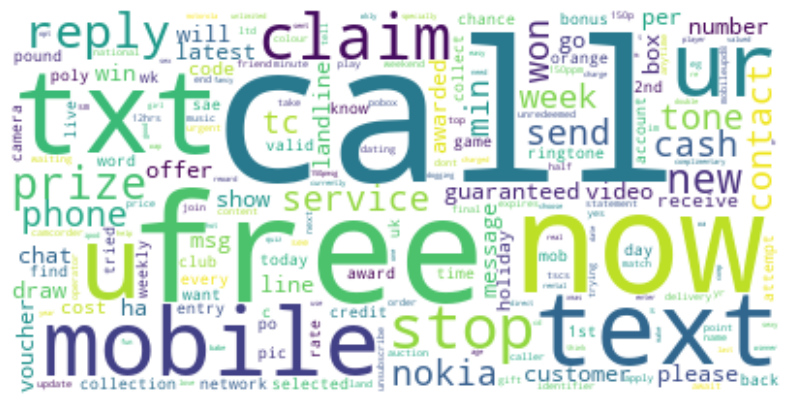

In [25]:
#Wordcloud for spam SMS
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(spam)
plt.figure(figsize=(10,12))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

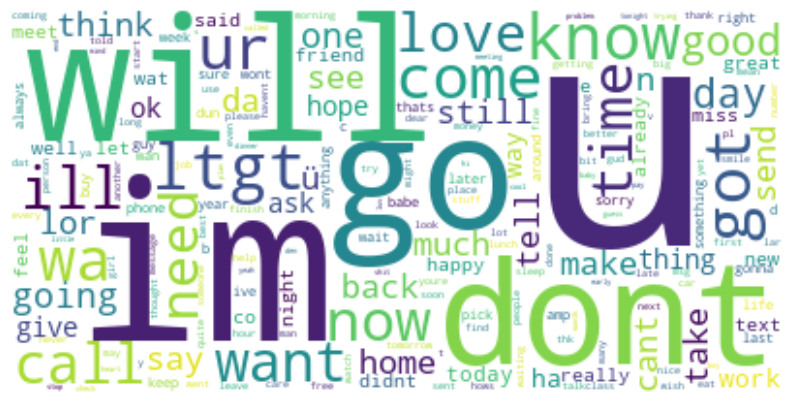

In [26]:
#Wordcloud for not spam SMS
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(ham)
plt.figure(figsize=(10,12))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## 4. vectarization

#### a> TF vectorization

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
countvect = CountVectorizer()
X = countvect.fit_transform(data.SMS)
X = X.toarray()

In [28]:
#The word list
words = countvect.get_feature_names_out()
len(words)

9002

In [29]:
DTM = pd.DataFrame(X,columns = words)
DTM.head()

,008704050406,0089my,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,...,zero,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,üll,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### b> TF-IDF vectorizer

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [31]:
tfidf = TfidfVectorizer()
tfidf_vectors = tfidf.fit_transform(data.SMS)
names = tfidf.get_feature_names_out()
tfidf_vectors = tfidf_vectors.toarray()
tfidf_vectors = pd.DataFrame(tfidf_vectors,columns=names)

In [32]:
tfidf_vectors.head()

,008704050406,0089my,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,...,zero,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,üll,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### c> word to vec

In [33]:
import pickle

In [34]:
! pip install gensim

In [35]:
import nltk
from gensim.models import KeyedVectors

In [36]:
embeddings = KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin', binary = True)

In [37]:
embeddings

In [38]:
import numpy as np

In [39]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [40]:
#Word tokenization
vec_lis = []
from nltk import word_tokenize
for i in range(len(data)):
    #tokenizing sms into words
    words = word_tokenize(data.SMS[i])
    #checking if the word is presented in embeddings dictionary
    bag_nd = np.array([embeddings[word] for word in words if word in embeddings.key_to_index])
    #if not any word is presented into embeddings we are giving none
    if len(bag_nd)==0:
        vec = embeddings['none']
    #else fpr each word we are finding embeddings and adding all the vectors to get one
    else:
        vec = 0
        for i in range(len(bag_nd)):
            vec += bag_nd[i]
    vec_lis.append(vec)

In [41]:
len(vec_lis)

5169

In [42]:
#creating dictionary for each element of vector so that we can get dataframe with 300 columns
Dic = {}
for i in range(300):
    lis = []
    #we are ittrating each vector for it's ith element and creating a list of it
    for j in range(len(vec_lis)):
        lis.append(vec_lis[j][i])
    Dic[i] = lis

In [43]:
#giving this SMS lables 
Dic['Lable'] = list(data.Lables)

In [44]:
word2vec = pd.DataFrame(Dic)

In [45]:
word2vec.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,Lable
0,-0.277283,0.723389,0.379395,3.061523,-0.434479,0.545715,1.147522,-1.344482,0.200500,1.083086,...,0.594177,-1.650635,1.291077,0.080200,-0.458130,0.387207,-1.118958,-0.733032,0.424713,ham
1,-0.379410,0.482300,0.365662,0.614990,-0.473145,0.211426,-0.318237,-0.440613,0.060303,0.483765,...,0.634033,-0.806580,-0.247925,-1.007812,-0.972656,-0.836426,-0.685150,-0.437256,0.655273,ham
2,0.083717,-0.421021,-1.131348,1.325439,1.215027,0.338737,-0.224487,-1.642548,0.740234,2.273132,...,0.283447,-0.323425,-0.118164,0.292358,-0.040527,-0.141449,-2.218491,-1.631401,0.122410,spam
3,-0.603577,0.198181,1.083099,0.992737,-1.084961,-0.128670,-0.315002,-1.143555,0.046631,1.199707,...,0.758301,-0.679749,-0.060425,-0.643677,-1.222412,-0.790230,-0.848022,-0.031006,0.988289,ham
4,0.114502,0.455353,0.612061,1.947754,-0.132202,0.038574,0.291992,-1.025673,1.082764,0.636370,...,1.324829,-1.531738,0.444336,-1.324188,-0.000732,-0.179199,-0.967773,0.359676,-0.345520,ham


In [46]:
word2vec.shape

(5169, 301)

##  Dimension Reduction

### a>PCA

In [50]:
from sklearn.decomposition import PCA

In [51]:
pca = PCA(n_components=0.95)
principalComponents = pca.fit_transform(DTM)
principaltf = pd.DataFrame(data = principalComponents)

principaltf

,0,1,2,3,4,5,6,7,8,9,...,1699,1700,1701,1702,1703,1704,1705,1706,1707,1708
0,-0.769159,-0.127985,-0.086241,0.013617,0.005847,-0.202484,-0.031157,-0.097356,-0.123328,0.059774,...,0.009228,0.014281,0.045026,0.017411,-0.028034,0.012527,0.046787,-0.006044,-0.007662,-0.031993
1,-0.844097,-0.162398,-0.098861,-0.010657,-0.059785,-0.158888,-0.021097,-0.079095,-0.119479,0.049441,...,0.017580,0.037098,0.054901,0.020731,-0.019023,-0.046595,-0.052629,0.098719,0.023077,0.014757
2,0.772855,2.026864,-1.689063,-0.083200,-0.148245,-0.631633,0.161327,0.021661,0.502081,0.292671,...,0.016206,0.027009,-0.011414,0.013671,-0.019592,-0.016691,0.003056,-0.009361,-0.021798,-0.009304
3,-0.773128,-0.115648,-0.032839,0.100510,-0.013154,-0.203335,0.008011,-0.070969,-0.109406,-0.035392,...,0.019959,-0.023249,0.005190,0.024196,0.008049,0.010092,-0.003423,-0.009643,-0.005266,-0.003876
4,-0.160804,0.531777,-0.456456,0.254455,0.030132,-0.362646,0.112874,-0.204882,-0.016254,-0.146592,...,0.006527,-0.005275,0.013881,0.006479,-0.034136,0.003017,-0.001615,-0.008820,0.011519,0.018852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5164,0.280802,0.672115,1.313700,-1.700149,-0.811786,0.998882,1.259906,0.141318,-0.530204,-1.096825,...,0.014337,-0.026517,-0.011247,-0.003179,-0.016571,0.016562,-0.006869,-0.022242,0.005125,-0.010146
5165,-0.273896,0.531870,-0.533514,-0.009854,-0.054300,-0.318987,0.001190,-0.110576,0.015376,0.241269,...,0.003545,-0.053654,0.055623,0.012199,0.024826,0.034204,-0.010944,-0.000558,-0.037022,0.011702
5166,-0.500497,-0.002944,0.280903,-0.000183,0.148256,0.041675,-0.065210,-0.032748,0.927777,0.356253,...,-0.026766,-0.009007,0.174876,0.064145,-0.001104,0.028337,0.045052,-0.071715,-0.121742,-0.047513
5167,0.740543,1.168445,0.881393,0.298077,-0.087626,0.019487,-0.729891,-0.413858,0.727782,0.395867,...,-0.039183,-0.041439,-0.004109,0.014292,-0.054009,0.029390,-0.021500,0.065309,-0.022191,-0.002464


In [52]:
principalComponents = pca.fit_transform(tfidf_vectors)
principalTFIDF = pd.DataFrame(data = principalComponents)

principalTFIDF

,0,1,2,3,4,5,6,7,8,9,...,2753,2754,2755,2756,2757,2758,2759,2760,2761,2762
0,-0.076506,0.018170,0.039621,-0.042971,-0.016319,-0.065574,-0.007688,-0.029940,-0.015828,-0.018931,...,-0.009608,0.014655,0.003448,-0.005313,-0.003627,0.003100,0.006110,0.001749,-0.010465,0.014928
1,-0.130259,0.126101,0.117740,0.026901,-0.133871,0.078685,-0.041558,0.073128,-0.011242,0.022153,...,0.013781,-0.021599,-0.013134,0.007353,-0.006956,0.009758,-0.004253,0.004046,0.016817,0.009643
2,-0.037872,-0.109552,0.014222,0.087406,-0.024676,-0.018552,-0.089061,-0.039993,-0.020707,0.023408,...,-0.001184,0.006129,-0.002222,-0.001134,0.002003,0.018035,-0.009635,0.002780,0.003264,-0.006711
3,-0.106569,0.089294,0.044143,-0.013272,-0.030505,-0.102492,0.023888,-0.032897,-0.045329,-0.045518,...,-0.002126,0.007935,0.012388,-0.012108,0.021141,-0.007157,-0.005625,0.018278,-0.005989,-0.023259
4,-0.032148,0.019280,-0.059401,0.071094,-0.028578,-0.077025,0.011246,-0.066102,-0.042002,0.025552,...,-0.004300,0.002432,0.003320,-0.004902,0.000081,0.000526,-0.004183,-0.002392,0.003960,0.000883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5164,-0.016203,-0.221310,-0.028704,-0.058421,-0.089592,0.101875,0.020599,0.077309,-0.031173,-0.217448,...,-0.001820,0.007606,0.004222,-0.011157,-0.013216,-0.006038,0.005675,-0.003091,-0.001747,-0.000110
5165,-0.050248,-0.023635,-0.005923,0.086622,0.060229,-0.064729,-0.192156,0.006980,0.082754,0.033518,...,-0.003113,0.010680,-0.004708,-0.003146,-0.000024,-0.007552,-0.011270,0.006461,-0.000522,0.000254
5166,-0.042820,-0.008804,-0.040746,-0.075490,0.011507,0.048177,0.013970,-0.026357,-0.032388,0.071275,...,-0.006573,0.001897,0.002974,0.003999,-0.004719,0.013007,0.002720,-0.001380,-0.003246,-0.000177
5167,-0.003926,-0.025717,-0.157638,0.044421,0.002364,0.076139,-0.010277,-0.017790,-0.020172,0.038847,...,0.004394,-0.002596,0.018847,0.006958,-0.007364,-0.009484,0.012724,-0.010940,0.008320,0.007035


In [53]:
word2vec.columns = word2vec.columns.astype(str)

In [54]:
pca = PCA(n_components=0.95)
principalComponents = pca.fit_transform(word2vec.drop('Lable',axis=1))
principalW2v = pd.DataFrame(data = principalComponents)
principalW2v

,0,1,2,3,4,5,6,7,8,9,...,150,151,152,153,154,155,156,157,158,159
0,-0.097242,-4.075085,1.506410,0.690885,0.679358,1.268881,-1.576367,0.532457,2.089303,-1.400943,...,-0.129025,-0.385381,-0.087179,-0.329933,-0.128767,0.333533,-0.185533,-0.260484,-0.231330,0.016214
1,-5.543370,-6.605470,-1.629826,-0.059420,0.256921,1.056839,0.201664,-0.560323,-0.225047,0.222850,...,-0.067158,-0.397116,0.205671,-0.099240,0.158960,-0.141253,-0.202794,-0.030360,0.301807,0.207476
2,0.885765,-4.359048,10.237515,0.656390,-0.936096,-0.282257,-2.200909,1.222633,-0.027273,0.211133,...,0.280828,-0.007437,0.075567,0.781990,0.318285,-0.623648,0.792263,0.507219,-0.559764,0.295124
3,-1.560653,-4.386802,-0.817546,1.337021,-2.552582,1.789715,0.322329,0.130985,-1.123275,-0.045057,...,-0.126611,0.048853,-0.235926,0.020051,-0.023327,0.071484,-0.027468,0.684669,-0.178464,-0.098803
4,0.516635,-1.374282,-3.619065,0.593519,-1.226502,-0.606083,0.212102,-0.543598,-0.021706,0.701477,...,0.017704,0.018166,-0.345253,0.290898,-0.014377,0.099924,-0.116734,-0.051413,-0.298046,0.383627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5164,5.831505,2.967716,5.752060,4.449230,-1.689325,-0.031579,0.597006,2.315832,-1.881932,1.979977,...,0.325031,-0.558522,-0.126361,0.684892,-0.467333,-0.008295,-0.459258,-0.392208,-0.074789,-0.310117
5165,-6.845913,-2.123595,1.240055,0.981115,-0.808454,0.907234,-0.326269,1.959800,-0.716280,-2.104178,...,0.133939,-0.235176,0.054369,0.107862,-0.074380,0.797367,-0.093172,-0.635657,-0.229833,-0.032652
5166,-6.614543,0.851365,-0.538265,1.776083,0.119940,1.333892,1.825000,-0.722323,0.469847,0.177130,...,-0.402512,0.279975,-0.037919,-0.087533,-0.291939,-0.189417,0.177915,-0.490955,0.490889,-0.284446
5167,8.872339,3.761688,-0.476589,1.983087,-1.190946,-0.987395,0.386894,-1.756235,0.139998,2.578658,...,0.256086,-0.350862,0.626203,-0.284308,-0.397732,-0.567359,-0.186701,0.079053,0.329358,-0.420526


### visulizing across 2 PCs

In [55]:
# Creating empty data frame to add 1st 2 pcs of each 
principalDf_Vis = pd.DataFrame()
principalDf_Vis['tf_PC1'] = principaltf.iloc[:, 0]
principalDf_Vis['tf_PC2'] = principaltf.iloc[:, 1]
principalDf_Vis['tfidf_PC1'] = principalTFIDF.iloc[:, 0]
principalDf_Vis['tfidf_PC2'] = principalTFIDF.iloc[:, 1]
principalDf_Vis['w2v_PC1'] = principalW2v.iloc[:, 0]
principalDf_Vis['w2v_PC2'] = principalW2v.iloc[:, 1]
principalDf_Vis['Label'] = data.Lables

In [56]:
principalDf_Vis

,tf_PC1,tf_PC2,tfidf_PC1,tfidf_PC2,w2v_PC1,w2v_PC2,Label
0,-0.769159,-0.127985,-0.076506,0.018170,-0.097242,-4.075085,ham
1,-0.844097,-0.162398,-0.130259,0.126101,-5.543370,-6.605470,ham
2,0.772855,2.026864,-0.037872,-0.109552,0.885765,-4.359048,spam
3,-0.773128,-0.115648,-0.106569,0.089294,-1.560653,-4.386802,ham
4,-0.160804,0.531777,-0.032148,0.019280,0.516635,-1.374282,ham
...,...,...,...,...,...,...,...
5164,0.280802,0.672115,-0.016203,-0.221310,5.831505,2.967716,spam
5165,-0.273896,0.531870,-0.050248,-0.023635,-6.845913,-2.123595,ham
5166,-0.500497,-0.002944,-0.042820,-0.008804,-6.614543,0.851365,ham
5167,0.740543,1.168445,-0.003926,-0.025717,8.872339,3.761688,ham


In [57]:
import seaborn as sns

<AxesSubplot: xlabel='tf_PC1', ylabel='tf_PC2'>

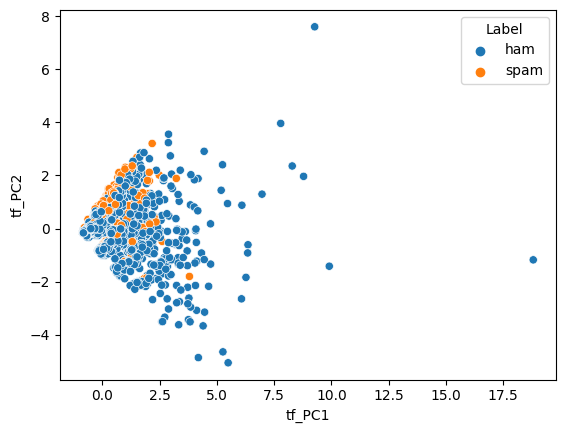

In [58]:
sns.scatterplot(x = principalDf_Vis["tf_PC1"], y = principalDf_Vis["tf_PC2"], data = principalDf_Vis, hue = principalDf_Vis["Label"])

<AxesSubplot: xlabel='tfidf_PC1', ylabel='tfidf_PC2'>

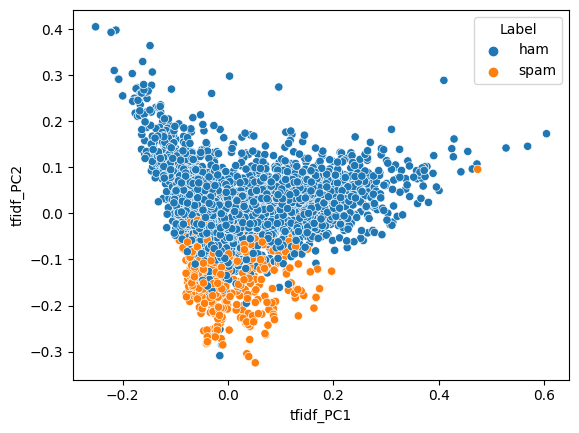

In [59]:
sns.scatterplot(x = principalDf_Vis["tfidf_PC1"], y = principalDf_Vis["tfidf_PC2"], data = principalDf_Vis, hue = principalDf_Vis["Label"])

<AxesSubplot: xlabel='w2v_PC1', ylabel='w2v_PC2'>

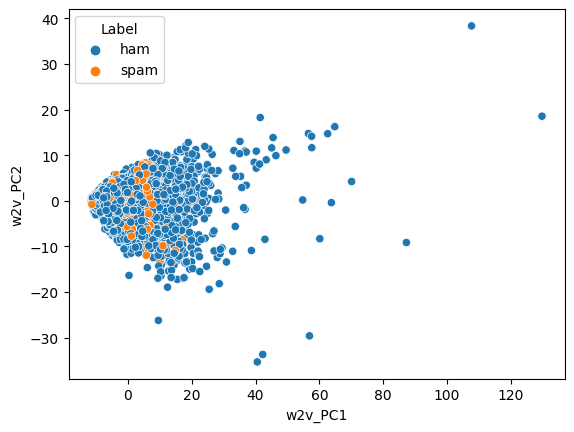

In [60]:
sns.scatterplot(x = principalDf_Vis["w2v_PC1"], y = principalDf_Vis["w2v_PC2"], data = principalDf_Vis, hue = principalDf_Vis["Label"])

In [61]:
#removing colums which has value less than 1%
#ceratin dataframe to store the value in ech columns
df = pd.DataFrame(DTM.apply(lambda x: (np.sum(x)/len(x))*100, axis=0),columns=['value'])

#storing columns as freaquent which are apearing more than 1% sms
frequent = list(df.loc[df.value>0.1].index)

#slecting frequent columns only
DTM_reduced = DTM[frequent]
DTM_reduced.shape,DTM.shape

((5169, 1396), (5169, 9002))

In [62]:
#removing colums which has value less than 1%
#ceratin dataframe to store the value in ech columns
df = pd.DataFrame(tfidf_vectors.apply(lambda x: (np.sum(x)/len(x))*100, axis=0),columns=['value'])

#storing columns as freaquent which are apearing more than 1% sms
frequent = list(df.loc[df.value>0.1].index)

#slecting frequent columns only
tfidf_vectors_reduced = tfidf_vectors[frequent]
tfidf_vectors_reduced.shape,tfidf_vectors.shape

((5169, 560), (5169, 9002))

In [63]:
#labling spam=1 and ham=0
DTM_reduced['Label'] = data.Lables.map({'ham':0, 'spam':1})

C:\Users\Admin\AppData\Local\Temp\ipykernel_15300\1490074715.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DTM_reduced['Label'] = data.Lables.map({'ham':0, 'spam':1})


In [64]:
tfidf_vectors_reduced['Label'] = data.Lables.map({'ham':0, 'spam':1})

C:\Users\Admin\AppData\Local\Temp\ipykernel_15300\137577973.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tfidf_vectors_reduced['Label'] = data.Lables.map({'ham':0, 'spam':1})


In [65]:
word2vec['Label'] = data.Lables.map({'ham':0, 'spam':1})

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, classification_report

# Models on TF

In [69]:
x=DTM_reduced.drop('Label',axis=1)
y=DTM_reduced.Label

In [70]:
X_train, X_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.3)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.3)

# LogisticRegression

In [71]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       949
           1       0.98      0.80      0.88       137

    accuracy                           0.97      1086
   macro avg       0.98      0.90      0.93      1086
weighted avg       0.97      0.97      0.97      1086

[[947   2]
 [ 27 110]]


In [72]:
## Tuning Parameters for Logistic Regression
params_logit = {'solver' :['newton-cg', 'lbfgs', 'liblinear'] , 'penalty' : ['l2'], 
                'C' : [100, 10, 1.0, 0.1, 0.01]}

In [73]:
from sklearn.model_selection import RandomizedSearchCV

model = LogisticRegression()  ## Model to tune

# make Grid Search CV object
clf = RandomizedSearchCV(model, param_distributions=params_logit  )

# Fit with data
clf.fit(X_train, y_train)

# See the best values we obtain
clf.best_params_, clf.best_score_

({'solver': 'lbfgs', 'penalty': 'l2', 'C': 10}, 0.9762993973696314)

In [74]:
lr = LogisticRegression(penalty = 'l2', solver = 'newton-cg', C = 1)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       949
           1       0.98      0.80      0.88       137

    accuracy                           0.97      1086
   macro avg       0.98      0.90      0.93      1086
weighted avg       0.97      0.97      0.97      1086

[[947   2]
 [ 27 110]]


# DecisionTreeClassifier

In [75]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       949
           1       0.82      0.80      0.81       137

    accuracy                           0.95      1086
   macro avg       0.90      0.89      0.89      1086
weighted avg       0.95      0.95      0.95      1086

[[925  24]
 [ 28 109]]


In [76]:
## Tuning Parameters for Decision Tree Classifier
params_dtf = {'max_depth': [20, 30, 40, 50], 'min_samples_leaf': [5, 10, 20, 50], 
              'criterion': ["gini", "entropy"]}

In [77]:
model = DecisionTreeClassifier()  ## Model to tune

# make Grid Search CV object
clf = RandomizedSearchCV(model, param_distributions=params_dtf  )

# Fit with data
clf.fit(X_train, y_train)

# See the best values we obtain
clf.best_params_, clf.best_score_

({'min_samples_leaf': 5, 'max_depth': 50, 'criterion': 'entropy'},
 0.9387913090254228)

In [78]:
dt = DecisionTreeClassifier(max_depth= 50, min_samples_leaf= 10, criterion='entropy')
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       949
           1       0.85      0.60      0.70       137

    accuracy                           0.94      1086
   macro avg       0.90      0.79      0.83      1086
weighted avg       0.93      0.94      0.93      1086

[[935  14]
 [ 55  82]]


# RandomForestClassifier

In [79]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       949
           1       1.00      0.72      0.84       137

    accuracy                           0.97      1086
   macro avg       0.98      0.86      0.91      1086
weighted avg       0.97      0.97      0.96      1086

[[949   0]
 [ 38  99]]


In [80]:
## Tuning Parameters for Random Forest Classifier
params_rfc = { "max_depth" : [5,7,9,11,13], "max_leaf_nodes" : [10,15,20,25,30], 
              "min_samples_leaf" : [3,5,7,9,11,13], "n_estimators" : [50,100,150], "max_features" : [5,7,9,11] }

In [81]:
model = RandomForestClassifier()  ## Model to tune

# make Grid Search CV object
clf = RandomizedSearchCV(model, param_distributions=params_rfc  )

# Fit with data
clf.fit(X_train, y_train)

# See the best values we obtain
clf.best_params_, clf.best_score_

({'n_estimators': 100,
  'min_samples_leaf': 5,
  'max_leaf_nodes': 30,
  'max_features': 11,
  'max_depth': 11},
 0.8799393471634275)

In [82]:
rfc = RandomForestClassifier(max_depth= 13, min_samples_leaf= 5, max_features= 11, max_leaf_nodes= 20,n_estimators= 100)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       949
           1       1.00      0.08      0.15       137

    accuracy                           0.88      1086
   macro avg       0.94      0.54      0.54      1086
weighted avg       0.90      0.88      0.84      1086

[[949   0]
 [126  11]]


## Models on tfidf

In [83]:
x=tfidf_vectors_reduced.drop('Label',axis=1)
y=tfidf_vectors_reduced.Label

In [84]:
X_train, X_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.3)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.3)

# LogisticRegression

In [85]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       950
           1       0.97      0.46      0.62       136

    accuracy                           0.93      1086
   macro avg       0.95      0.73      0.79      1086
weighted avg       0.93      0.93      0.92      1086

[[948   2]
 [ 74  62]]


In [86]:
## Tuning Parameters for Logistic Regression
params_logit = {'solver' :['newton-cg', 'lbfgs', 'liblinear'] , 'penalty' : ['l2'], 
                'C' : [100, 10, 1.0, 0.1, 0.01]}

In [87]:
from sklearn.model_selection import RandomizedSearchCV

model = LogisticRegression()  ## Model to tune

# make Grid Search CV object
clf = RandomizedSearchCV(model, param_distributions=params_logit  )

# Fit with data
clf.fit(X_train, y_train)

# See the best values we obtain
clf.best_params_, clf.best_score_

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

({'solver': 'lbfgs', 'penalty': 'l2', 'C': 10}, 0.965640713801249)

In [88]:
lr = LogisticRegression(penalty = 'l2', solver = 'liblinear', C = 100)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       950
           1       0.87      0.83      0.85       136

    accuracy                           0.96      1086
   macro avg       0.92      0.91      0.91      1086
weighted avg       0.96      0.96      0.96      1086

[[933  17]
 [ 23 113]]


# DecisionTreeClassifier

In [89]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       950
           1       0.78      0.82      0.80       136

    accuracy                           0.95      1086
   macro avg       0.88      0.89      0.88      1086
weighted avg       0.95      0.95      0.95      1086

[[919  31]
 [ 25 111]]


In [90]:
## Tuning Parameters for Decision Tree Classifier
params_dtf = {'max_depth': [20, 30, 40, 50], 'min_samples_leaf': [5, 10, 20, 50], 
              'criterion': ["gini", "entropy"]}

In [91]:
model = DecisionTreeClassifier()  ## Model to tune

# make Grid Search CV object
clf = RandomizedSearchCV(model, param_distributions=params_dtf  )

# Fit with data
clf.fit(X_train, y_train)

# See the best values we obtain
clf.best_params_, clf.best_score_

({'min_samples_leaf': 10, 'max_depth': 30, 'criterion': 'entropy'},
 0.9447014523937602)

In [92]:
dt = DecisionTreeClassifier(max_depth= 30, min_samples_leaf= 5, criterion='entropy')
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       950
           1       0.70      0.69      0.69       136

    accuracy                           0.92      1086
   macro avg       0.83      0.82      0.83      1086
weighted avg       0.92      0.92      0.92      1086

[[909  41]
 [ 42  94]]


# RandomForestClassifier

In [93]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       950
           1       0.97      0.79      0.87       136

    accuracy                           0.97      1086
   macro avg       0.97      0.89      0.93      1086
weighted avg       0.97      0.97      0.97      1086

[[947   3]
 [ 29 107]]


In [94]:
## Tuning Parameters for Random Forest Classifier
params_rfc = { "max_depth" : [5,7,9,11,13], "max_leaf_nodes" : [10,15,20,25,30], 
              "min_samples_leaf" : [3,5,7,9,11,13], "n_estimators" : [50,100,150], "max_features" : [5,7,9,11] }

In [95]:
model = RandomForestClassifier()  ## Model to tune

# make Grid Search CV object
clf = RandomizedSearchCV(model, param_distributions=params_rfc  )

# Fit with data
clf.fit(X_train, y_train)

# See the best values we obtain
clf.best_params_, clf.best_score_

({'n_estimators': 100,
  'min_samples_leaf': 3,
  'max_leaf_nodes': 15,
  'max_features': 9,
  'max_depth': 11},
 0.9067942091353463)

In [96]:
rfc = RandomForestClassifier(max_depth= 13, min_samples_leaf= 5, max_features= 9, max_leaf_nodes= 15,n_estimators= 100)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       950
           1       1.00      0.27      0.43       136

    accuracy                           0.91      1086
   macro avg       0.95      0.64      0.69      1086
weighted avg       0.92      0.91      0.89      1086

[[950   0]
 [ 99  37]]


# Models on word2vec

In [97]:
x=word2vec.drop('Lable',axis=1)
y=word2vec.Lable

In [98]:
X_train, X_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.3)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.3)

# LogisticRegression

In [99]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       959
        spam       0.97      0.94      0.96       127

    accuracy                           0.99      1086
   macro avg       0.98      0.97      0.98      1086
weighted avg       0.99      0.99      0.99      1086

[[955   4]
 [  7 120]]


In [100]:
## Tuning Parameters for Logistic Regression
params_logit = {'solver' :['newton-cg', 'lbfgs', 'liblinear'] , 'penalty' : ['l2'], 
                'C' : [100, 10, 1.0, 0.1, 0.01]}

In [101]:
from sklearn.model_selection import RandomizedSearchCV

model = LogisticRegression()  ## Model to tune

# make Grid Search CV object
clf = RandomizedSearchCV(model, param_distributions=params_logit  )

# Fit with data
clf.fit(X_train, y_train)

# See the best values we obtain
clf.best_params_, clf.best_score_

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

({'solver': 'liblinear', 'penalty': 'l2', 'C': 100}, 0.9956560719102526)

In [102]:
lr = LogisticRegression(penalty = 'l2', solver = 'lbfgs', C = 100)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         ham       1.00      1.00      1.00       959
        spam       0.99      0.98      0.99       127

    accuracy                           1.00      1086
   macro avg       0.99      0.99      0.99      1086
weighted avg       1.00      1.00      1.00      1086

[[958   1]
 [  2 125]]


# DecisionTreeClassifier

In [103]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         ham       1.00      1.00      1.00       959
        spam       1.00      1.00      1.00       127

    accuracy                           1.00      1086
   macro avg       1.00      1.00      1.00      1086
weighted avg       1.00      1.00      1.00      1086

[[959   0]
 [  0 127]]


In [104]:
## Tuning Parameters for Decision Tree Classifier
params_dtf = {'max_depth': [20, 30, 40, 50], 'min_samples_leaf': [5, 10, 20, 50], 
              'criterion': ["gini", "entropy"]}

In [105]:
model = DecisionTreeClassifier()  ## Model to tune

# make Grid Search CV object
clf = RandomizedSearchCV(model, param_distributions=params_dtf  )

# Fit with data
clf.fit(X_train, y_train)

# See the best values we obtain
clf.best_params_, clf.best_score_

({'min_samples_leaf': 5, 'max_depth': 30, 'criterion': 'gini'}, 1.0)

In [106]:
dt = DecisionTreeClassifier(max_depth= 40, min_samples_leaf= 5, criterion='entropy')
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         ham       1.00      1.00      1.00       959
        spam       1.00      1.00      1.00       127

    accuracy                           1.00      1086
   macro avg       1.00      1.00      1.00      1086
weighted avg       1.00      1.00      1.00      1086

[[959   0]
 [  0 127]]


# RandomForestClassifier

In [107]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         ham       1.00      1.00      1.00       959
        spam       1.00      0.98      0.99       127

    accuracy                           1.00      1086
   macro avg       1.00      0.99      1.00      1086
weighted avg       1.00      1.00      1.00      1086

[[959   0]
 [  2 125]]


In [108]:
## Tuning Parameters for Random Forest Classifier
params_rfc = { "max_depth" : [5,7,9,11,13], "max_leaf_nodes" : [10,15,20,25,30], 
              "min_samples_leaf" : [3,5,7,9,11,13], "n_estimators" : [50,100,150], "max_features" : [5,7,9,11] }

In [109]:
model = RandomForestClassifier()  ## Model to tune

# make Grid Search CV object
clf = RandomizedSearchCV(model, param_distributions=params_rfc  )

# Fit with data
clf.fit(X_train, y_train)

# See the best values we obtain
clf.best_params_, clf.best_score_

({'n_estimators': 100,
  'min_samples_leaf': 3,
  'max_leaf_nodes': 25,
  'max_features': 11,
  'max_depth': 11},
 0.9711665146447755)

In [110]:
rfc = RandomForestClassifier(max_depth= 13, min_samples_leaf= 5, max_features= 7, max_leaf_nodes= 25,n_estimators= 150)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.97       959
        spam       0.95      0.64      0.76       127

    accuracy                           0.95      1086
   macro avg       0.95      0.82      0.87      1086
weighted avg       0.95      0.95      0.95      1086

[[955   4]
 [ 46  81]]


# conclusion:
        
        For TF vectorized data we are getting highest F1 score for both classes 0.95 with SVC and LogisticRegression.
        For TF-IDF vectorized data we are getting highrst f1 score 0.98 with SVC.
        for word 2 vec all models are giving f1 score more than 0.93.
        as per our experiment we can see that SVC is giving us very good results for all the type of data.
        AND word 2 vec model is giving good results with all models compare to other vetoried data.
        